In [72]:
import numpy as np # linear algebra
import pandas as pd
import openpyxl
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
summer = pd.read_csv("Athletes_summer_games.csv")
print(summer.head())

   Unnamed: 0                                Name Sex   Age            Team  \
0           0                           A Dijiang   M  24.0           China   
1           1                            A Lamusi   M  23.0           China   
2           2                 Gunnar Nielsen Aaby   M  24.0         Denmark   
3           3                Edgar Lindenau Aabye   M  34.0  Denmark/Sweden   
4          26  Cornelia "Cor" Aalten (-Strannood)   F  18.0     Netherlands   

   NOC        Games  Year  Season         City       Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1  CHN  2012 Summer  2012  Summer       London        Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal  
0   Basketball Men's Basketball   NaN  
1  Judo Men's Extra-Lightweight   NaN  
2       Football Men's Football 

In [111]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237673 entries, 0 to 237672
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  237673 non-null  int64  
 1   Name        237673 non-null  object 
 2   Sex         237673 non-null  object 
 3   Age         228484 non-null  float64
 4   Team        237673 non-null  object 
 5   NOC         237673 non-null  object 
 6   Games       237673 non-null  object 
 7   Year        237673 non-null  int64  
 8   Season      237673 non-null  object 
 9   City        237673 non-null  object 
 10  Sport       237673 non-null  object 
 11  Event       237673 non-null  object 
 12  Medal       36537 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 23.6+ MB


In [112]:
summer.shape

(237673, 13)

In [113]:
pd.isnull(summer).sum() 

Unnamed: 0         0
Name               0
Sex                0
Age             9189
Team               0
NOC                0
Games              0
Year               0
Season             0
City               0
Sport              0
Event              0
Medal         201136
dtype: int64

In [115]:
summer.dropna(inplace=True)

In [4]:
print(summer[summer.Team == 'Central Turnverein, Chicago'])

        Unnamed: 0                   Name Sex   Age  \
50011        59525    John Alexander Duha   M  29.0   
103984      126595         Charles Krause   M   NaN   
125993      153387           George Mayer   M   NaN   
126098      153538    Robert Emil Maysack   M  31.0   
176462      214663    Philip Nat Schuster   M  21.0   
180379      219536  Edward Victor Siegler   M  22.0   

                               Team  NOC        Games  Year  Season  \
50011   Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
103984  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
125993  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
126098  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
176462  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   
180379  Central Turnverein, Chicago  USA  1904 Summer  1904  Summer   

             City       Sport                             Event   Medal  
50011   St. Louis  Gymnastics  Gymnastics 

In [5]:
print(summer[summer.NOC == 'URS'])

        Unnamed: 0                                      Name Sex   Age  \
130            192              Rost'om Omeris dze Abashidze   M  29.0   
131            193  Nunu Dzhansuhivna Abashydze (-Myslaieva)   F  25.0   
481            550          Zagalav Abdulbekovich Abdulbekov   M  26.0   
553            622  Dzhamolidin Mirgarifanovich Abduzhaparov   M  24.0   
706            802                Viktor Andreyevich Aboimov   M  22.0   
...            ...                                       ...  ..   ...   
222526      271076       Galina Ivanovna Zybina (-Fyodorova)   F  21.0   
222527      271077       Galina Ivanovna Zybina (-Fyodorova)   F  21.0   
222528      271078       Galina Ivanovna Zybina (-Fyodorova)   F  25.0   
222529      271079       Galina Ivanovna Zybina (-Fyodorova)   F  29.0   
222530      271080       Galina Ivanovna Zybina (-Fyodorova)   F  33.0   

                Team  NOC        Games  Year  Season       City      Sport  \
130     Soviet Union  URS  1964 S

In [6]:
print(summer.NOC.nunique())
print(summer.NOC.unique())
NOC = summer.groupby('NOC').Team.nunique()
print(NOC)

233
['CHN' 'DEN' 'NED' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY' 'IRI'
 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR' 'TUR'
 'CHI' 'MEX' 'USA' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'SRI' 'ARM' 'CIV' 'KEN' 'BEN'
 'GBR' 'GHA' 'SOM' 'NIG' 'MLI' 'AFG' 'POL' 'CRC' 'PAN' 'GEO' 'SLO' 'GUY'
 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'FRG' 'BAN' 'PER' 'ESA' 'PUR' 'UGA'
 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN' 'SKN' 'TTO' 'DOM' 'VIN'
 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW' 'LTU' 'TOG' 'NAM' 'AHO' 'UKR'
 'ISL' 'ASA' 'SAM' 'RWA' 'CRO' 'DMA' 'HAI' 'MLT' 'CYP' 'GUI' 'BIZ' 'YMD'
 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA' 'OMA' 'FIJ' 'VAN' 'MDA'
 'BAH' 'GUA' 'YUG' 'LAT' 'SRB' 'IVB' 'MOZ' 'ISV

In [16]:
#print(countries)
summer_countries = pd.merge(summer,countries)
#correct where NOC code for ROC = Russia not China
summer_countries.loc[(summer_countries['NOC'] == 'ROC') & (summer_countries['Year'] == 2020 ), 'Country'] = 'Russia'


In [17]:
#checking to see what kind of sports are included in Athletics
print(summer[summer.Sport == 'Athletics'])

        Unnamed: 0                                Name Sex   Age         Team  \
4               26  Cornelia "Cor" Aalten (-Strannood)   F  18.0  Netherlands   
5               27  Cornelia "Cor" Aalten (-Strannood)   F  18.0  Netherlands   
31              57                Timo Antero Aaltonen   M  31.0      Finland   
44              94                   Evald rma (rman-)   M  24.0      Estonia   
45              95                Olav Augunson Aarnes   M  23.0       Norway   
...            ...                                 ...  ..   ...          ...   
237626       15074                     ZIMNY Tymoteusz   M  23.0       Poland   
237631       15079                       ZIUKAS Marius   M  36.0    Lithuania   
237635       15083                        ZOGHLAMI Ala   M  27.0        Italy   
237636       15084                      ZOGHLAMI Osama   M  27.0        Italy   
237637       15085                 ZOHRI Lalu Muhammad   M  21.0    Indonesia   

        NOC        Games  Y

In [20]:
#who is the oldest athlete to win a gold medal? 
goldm = summer[summer.Medal == 'Gold']
gold_oldest = goldm[goldm.Age == goldm.Age.max()]
print(gold_oldest)
#youngest to win gold? 
goldm = summer[summer.Medal == 'Gold']
gold_youngest = goldm[goldm.Age == goldm.Age.min()]
print(gold_youngest)

        Unnamed: 0               Name Sex   Age           Team  NOC  \
86948       105199    Charles Jacobus   M  64.0  United States  USA   
191460      233390  Oscar Gomer Swahn   M  64.0         Sweden  SWE   

              Games  Year  Season       City     Sport  \
86948   1904 Summer  1904  Summer  St. Louis     Roque   
191460  1912 Summer  1912  Summer  Stockholm  Shooting   

                                                   Event Medal  
86948                                Roque Men's Singles  Gold  
191460  Shooting Men's Running Target, Single Shot, Team  Gold  
        Unnamed: 0                                Name Sex   Age  \
22737        27207                       Hans Bourquin   M  13.0   
43743        52010  Donna Elizabeth de Varona (-Pinto)   F  13.0   
61399        73581                          Fu Mingxia   F  13.0   
65470        78544        Marjorie Gestring (-Redlick)   F  13.0   
165110      200704       Aileen Muriel Riggin (-Soule)   F  13.0   
220652  

In [22]:
summer_medals = summer_countries.groupby(['Country','Medal']).Medal.count().reset_index(name = 'Count')
print(summer_medals)
summer_medals_pivot = summer_medals.pivot(columns = 'Medal', index = 'Country', values = 'Count').reset_index()
summer_medals_pivot = summer_medals_pivot.fillna(0)
print(summer_medals_pivot)

         Country   Medal  Count
0    Afghanistan  Bronze      2
1        Algeria  Bronze      8
2        Algeria    Gold      5
3        Algeria  Silver      4
4      Argentina  Bronze    116
..           ...     ...    ...
364       Zambia  Bronze      1
365       Zambia  Silver      1
366     Zimbabwe  Bronze      1
367     Zimbabwe    Gold     17
368     Zimbabwe  Silver      4

[369 rows x 3 columns]
Medal                 Country  Bronze   Gold  Silver
0                 Afghanistan     2.0    0.0     0.0
1                     Algeria     8.0    5.0     4.0
2                   Argentina   116.0   91.0   110.0
3                     Armenia    11.0    2.0     7.0
4                 Australasia     5.0   20.0     4.0
..                        ...     ...    ...     ...
144              West Germany   188.0  144.0   172.0
145    West Indies Federation     5.0    0.0     0.0
146                Yugoslavia    92.0  130.0   161.0
147                    Zambia     1.0    0.0     1.0
148      

In [23]:
summer_medals_pivot['Total'] = summer_medals_pivot.Bronze + summer_medals_pivot.Gold + summer_medals_pivot.Silver
summer_medals_pivot = summer_medals_pivot[['Country','Gold', 'Silver', 'Bronze', 'Total']]
summer_medals_pivot = summer_medals_pivot.sort_values(['Total'], ascending = False)
print(summer_medals_pivot)

Medal               Country    Gold  Silver  Bronze   Total
138           United States  2585.0  1443.0  1272.0  5300.0
48            Great Britain   677.0   772.0   677.0  2126.0
117            Soviet Union   832.0   635.0   596.0  2063.0
46                  Germany   613.0   564.0   683.0  1860.0
43                   France   530.0   617.0   621.0  1768.0
..                      ...     ...     ...     ...     ...
109                 Senegal     0.0     1.0     0.0     1.0
61                     Iraq     0.0     0.0     1.0     1.0
89     Netherlands Antilles     0.0     1.0     0.0     1.0
82                   Monaco     0.0     0.0     1.0     1.0
51                Guatemala     0.0     1.0     0.0     1.0

[149 rows x 5 columns]


In [26]:
summer_countries['Event_NOC_year'] = summer.Event + ' ' + summer.NOC + ' ' + summer.Year.astype(str) + ' ' + summer.Sport + ' '+ summer.Team
print(summer_countries.Event_NOC_year.unique())
summer_unique = summer_countries.drop_duplicates(subset = 'Event_NOC_year')


["Basketball Men's Basketball CHN 1992 Basketball China"
 "Judo Men's Extra-Lightweight CHN 2012 Judo China"
 "Football Men's Football DEN 1920 Football Denmark" ...
 "Women's Kayak POL 2020 Canoe Slalom Poland"
 "Women's One Person Dinghy - Laser Radial ROC 2020 Sailing Russia"
 "Women's Individual POL 2020 Archery Poland"]


In [27]:
print(summer_unique.head())
summer_medals_per_event = summer_unique.groupby(['Country','Medal']).Medal.count().reset_index(name = 'Count')
print(summer_medals_per_event)
summer_medals_event_pivot = summer_medals_per_event.pivot(columns = 'Medal', index = 'Country', values = 'Count').reset_index()
summer_medals_event_pivot = summer_medals_event_pivot.fillna(0)
print(summer_medals_event_pivot)
summer_medals_event_pivot['Total'] = summer_medals_event_pivot.Bronze + summer_medals_event_pivot.Gold + summer_medals_event_pivot.Silver
summer_medals_event_pivot = summer_medals_event_pivot[['Country','Gold', 'Silver', 'Bronze', 'Total']]
summer_medals_event_pivot = summer_medals_event_pivot.sort_values(['Total'], ascending = False)
print(summer_medals_event_pivot)

   Unnamed: 0           Name Sex   Age   Team  NOC        Games  Year  Season  \
0           0      A Dijiang   M  24.0  China  CHN  1992 Summer  1992  Summer   
1           1       A Lamusi   M  23.0  China  CHN  2012 Summer  2012  Summer   
2        1072  Abudoureheman   M  22.0  China  CHN  2000 Summer  2000  Summer   
3        2611      Ai Linuer   M  25.0  China  CHN  2004 Summer  2004  Summer   
4        2612      Ai Yanhan   F  14.0  China  CHN  2016 Summer  2016  Summer   

             City       Sport                                     Event Medal  \
0       Barcelona  Basketball               Basketball Men's Basketball   NaN   
1          London        Judo              Judo Men's Extra-Lightweight   NaN   
2          Sydney      Boxing                 Boxing Men's Middleweight   NaN   
3          Athina   Wrestling  Wrestling Men's Lightweight, Greco-Roman   NaN   
4  Rio de Janeiro    Swimming     Swimming Women's 200 metres Freestyle   NaN   

  Country                 

In [28]:
#how many athletes from each country
athletes = summer_countries.groupby('Country').Name.count().reset_index(name = 'number_of_athletes')
athletes = athletes.sort_values(['number_of_athletes'], ascending = False)
print(athletes)

           Country  number_of_athletes
212  United States               15920
77   Great Britain               11465
72          France               11171
97           Italy                8741
75         Germany                8219
..             ...                 ...
186    South Sudan                   5
187    South Yemen                   5
213        Unknown                   2
144   North Borneo                   2
140   Newfoundland                   1

[226 rows x 2 columns]


In [29]:
#add number of athletes to medal list to get % of medals won 
medals_pct = pd.merge(summer_medals_pivot, athletes) 
medals_pct['medal_pct'] = (medals_pct.Total/medals_pct.number_of_athletes)*100
medals_pct = medals_pct.sort_values(['medal_pct'], ascending = False)
print(medals_pct.head(233))

            Country    Gold  Silver  Bronze   Total  number_of_athletes  \
2      Soviet Union   832.0   635.0   596.0  2063.0                4622   
13     East Germany   339.0   277.0   227.0   843.0                2104   
33     Unified Team    92.0    61.0    67.0   220.0                 650   
74      Australasia    20.0     4.0     5.0    29.0                  86   
0     United States  2585.0  1443.0  1272.0  5300.0               15920   
..              ...     ...     ...     ...     ...                 ...   
131        Barbados     0.0     0.0     1.0     1.0                 228   
145            Iraq     0.0     0.0     1.0     1.0                 235   
132  Virgin Islands     0.0     1.0     0.0     1.0                 244   
144         Senegal     0.0     1.0     0.0     1.0                 384   
148       Guatemala     0.0     1.0     0.0     1.0                 434   

     medal_pct  
2    44.634357  
13   40.066540  
33   33.846154  
74   33.720930  
0    33.291457

In [30]:
#who has won the most medals
athlete_medals = summer.groupby('Name').Medal.count().reset_index(name = "Medal_count")
athlete_medals = athlete_medals.sort_values('Medal_count', ascending = False)
print(athlete_medals.head(10))

                                        Name  Medal_count
82048                Michael Fred Phelps, II           28
69238     Larysa Semenivna Latynina (Diriy-)           18
88443           Nikolay Yefimovich Andrianov           15
28291                    Edoardo Mangiarotti           13
112848                           Takashi Ono           13
15438            Borys Anfiyanovych Shakhlin           13
103843                    Ryan Steven Lochte           12
24087   Dara Grace Torres (-Hoffman, -Minas)           12
86677          Natalie Anne Coughlin (-Hall)           12
4157                 Aleksey Yuryevich Nemov           12


In [121]:
import seaborn as sns

In [124]:
ax=sns.countplot(x='Name', data='athlete_medals')


AttributeError: 'str' object has no attribute 'get'

In [88]:
athlete_medals.to_excel(r'C:\Users\Sunil kumar\OneDrive\Desktop\DATA ENGINEERING\Highest medals.xlsx')

In [58]:
excel_file = pd.ExcelWriter("athlete_medals.xlsx")

In [90]:
athlete = athlete_medals[athlete_medals ["Name"] == "Medal_count" ]
athlete.to_excel(excel_file, sheet_name = "Highest No's of medals by Athletes", index = False)

Michael Fred Phelps, II won the following medals:
      Sport   Medal  Medal count
0  Swimming  Bronze            2
1  Swimming    Gold           23
2  Swimming  Silver            3
Larysa Semenivna Latynina (Diriy-) won the following medals:
        Sport   Medal  Medal count
0  Gymnastics  Bronze            4
1  Gymnastics    Gold            9
2  Gymnastics  Silver            5
Nikolay Yefimovich Andrianov won the following medals:
        Sport   Medal  Medal count
0  Gymnastics  Bronze            3
1  Gymnastics    Gold            7
2  Gymnastics  Silver            5
Edoardo Mangiarotti won the following medals:
     Sport   Medal  Medal count
0  Fencing  Bronze            2
1  Fencing    Gold            6
2  Fencing  Silver            5
Takashi Ono won the following medals:
        Sport   Medal  Medal count
0  Gymnastics  Bronze            4
1  Gymnastics    Gold            5
2  Gymnastics  Silver            4
Borys Anfiyanovych Shakhlin won the following medals:
        Sport   

In [95]:
top_10_athletes = athlete_medals.Name.head(10)
top_10_details = summer[(summer.Name.isin(top_10_athletes)) & (summer.Medal.notnull())]
top_10_athlete_events = top_10_details.groupby(['Name','Sport','Medal']).Medal.count().unstack('Medal').fillna(0)
#reorder medal order

top_10_athlete_events = top_10_athlete_events[['Gold','Silver','Bronze']]
print(top_10_athlete_events)
#unstack_top_10 = top_10_athlete_events.pivot(columns = 'Event', index = 'Name', values = 'Medal').reset_index()
#print(pivot_top_10)

Medal                                            Gold  Silver  Bronze
Name                                 Sport                           
Aleksey Yuryevich Nemov              Gymnastics     4       2       6
Borys Anfiyanovych Shakhlin          Gymnastics     7       4       2
Dara Grace Torres (-Hoffman, -Minas) Swimming       4       4       4
Edoardo Mangiarotti                  Fencing        6       5       2
Larysa Semenivna Latynina (Diriy-)   Gymnastics     9       5       4
Michael Fred Phelps, II              Swimming      23       3       2
Natalie Anne Coughlin (-Hall)        Swimming       3       4       5
Nikolay Yefimovich Andrianov         Gymnastics     7       5       3
Ryan Steven Lochte                   Swimming       6       3       3
Takashi Ono                          Gymnastics     5       4       4


In [46]:
top_10_athlete_events.to_csv("Top 10 Athletes win totl- Gold,Silver,Bronze")

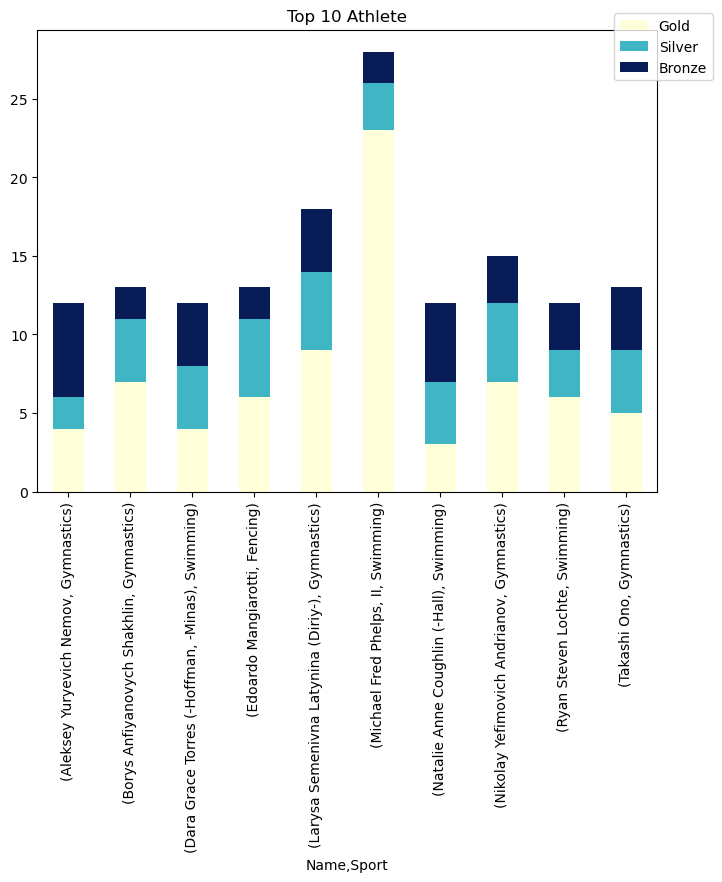

In [45]:
#create top 10 athlete bar chart
from matplotlib import pyplot as plt
ax = top_10_athlete_events.plot(kind = 'bar', figsize = (8,6), stacked = True, colormap = 'YlGnBu')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Top 10 Athlete")
plt.show()
plt.close()

In [34]:
#which countries have the most medals per sport? 
sport_list = summer.Sport.unique()
sport_list = sorted(sport_list)
print(sport_list)
country_sports = summer_unique.groupby(['Sport', 'Country']).Medal.count().reset_index(name = 'Medal_count')
print(country_sports)
for s in sport_list:
    sport = country_sports[country_sports.Sport == s]
    top3 = sport.sort_values('Medal_count', ascending = False)
    print(top3.head(3))

['3x3 Basketball', 'Aeronautics', 'Alpinism', 'Archery', 'Art Competitions', 'Artistic Gymnastics', 'Artistic Swimming', 'Athletics', 'Badminton', 'Baseball', 'Baseball/Softball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoe Slalom', 'Canoe Sprint', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Cycling BMX Freestyle', 'Cycling BMX Racing', 'Cycling Mountain Bike', 'Cycling Road', 'Cycling Track', 'Diving', 'Equestrian', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Karate', 'Lacrosse', 'Marathon Swimming', 'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Skateboarding', 'Softball', 'Sport Climbing', 'Surfing', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampoline Gymnastics', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water 

In [42]:
top3.to_csv("which countries have the most medals per sport")

In [35]:
#split between men and womens 
#mens
mens_summer = summer_unique[summer_unique.Sex == 'M']
country_men_sports = mens_summer.groupby(['Sport', 'Country']).Medal.count().reset_index(name = 'Medal_count')

for s in sport_list:
    Msport = country_men_sports[country_men_sports.Sport == s]
    top3m = Msport.sort_values('Medal_count', ascending = False)
    print(top3m.head(3))

            Sport Country  Medal_count
2  3x3 Basketball  Latvia            3
4  3x3 Basketball  Russia            3
5  3x3 Basketball  Serbia            2
Empty DataFrame
Columns: [Sport, Country, Medal_count]
Index: []
      Sport  Country  Medal_count
6  Alpinism  Germany            2
      Sport        Country  Medal_count
29  Archery         France           29
77  Archery  United States           18
67  Archery    South Korea           18
               Sport  Country  Medal_count
98  Art Competitions  Germany            9
97  Art Competitions   France            9
93  Art Competitions  Denmark            9
                   Sport  Country  Medal_count
132  Artistic Gymnastics    China            6
142  Artistic Gymnastics    Japan            3
127  Artistic Gymnastics  Armenia            1
Empty DataFrame
Columns: [Sport, Country, Medal_count]
Index: []
         Sport        Country  Medal_count
364  Athletics  United States          381
229  Athletics        Finland           

In [41]:
top3m.to_csv("Top 3 countries by men's sports")

In [36]:
#womens
womens_summer = summer_unique[summer_unique.Sex == 'F']
country_women_sports = womens_summer.groupby(['Sport', 'Country']).Medal.count().reset_index(name = 'Medal_count')

for s in sport_list:
    Wsport = country_women_sports[country_women_sports.Sport == s]
    top3W = Wsport.sort_values('Medal_count', ascending = False)
    print(top3W.head(3))

            Sport        Country  Medal_count
0  3x3 Basketball          China            4
7  3x3 Basketball  United States            2
6  3x3 Basketball         Russia            1
Empty DataFrame
Columns: [Sport, Country, Medal_count]
Index: []
Empty DataFrame
Columns: [Sport, Country, Medal_count]
Index: []
      Sport        Country  Medal_count
56  Archery    South Korea           22
18  Archery          China           14
66  Archery  United States            4
               Sport        Country  Medal_count
89  Art Competitions  United States            1
76  Art Competitions        Germany            1
83  Art Competitions    Netherlands            1
                   Sport        Country  Medal_count
126  Artistic Gymnastics  United States            5
117  Artistic Gymnastics         Russia            2
99   Artistic Gymnastics          China            1
                 Sport  Country  Medal_count
130  Artistic Swimming    China           10
140  Artistic Swimming  Ukra

In [40]:
top3W.to_csv("Top 3 countries by women's sports")